In [219]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

from world import World
from utils import chooseaction, getpolicy, getvalue, plotarrows

plt.rcParams['figure.facecolor']='white'

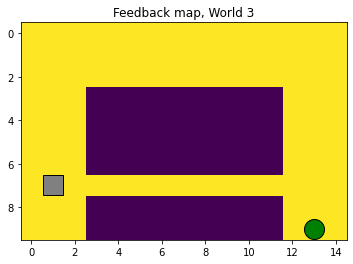

In [220]:
# Initialization
# Initialize the world, Q-table, and hyperparameters
eta        = 0.5
gamma      = 0.9
epsilon    = 0.2   
n_episodes = 500
actions    = [1, 2, 3, 4]
deltaEpsilon = epsilon/(n_episodes+1)
world      = 3

W = World(world)
W.draw()
Q = -1/2 * np.ones((W.y_size, W.x_size, 4))
Q[W.term] = [0,0,0,0]
Q[0, :, 1] = -np.inf
Q[W.y_size-1, :, 0] = -np.inf
Q[:, W.x_size-1, 2] = -np.inf
Q[:, 0, 3] = -np.inf

In [221]:
# Training loop
# Train the agent using the Q-learning algorithm.

for epi in range (n_episodes):
    W = World(world)
    epsilon -= deltaEpsilon
    
    while(W.pos != W.term):
        old_pos = W.pos
        
        action = chooseaction(W, Q, epsilon, actions)
        if Q[W.pos[0], W.pos[1], action-1] != -np.inf:
            performedAction = W.action(action)

            if performedAction[0] == 1:
                feedback = performedAction[1]
                value = getvalue(Q)[W.pos]
                #W.draw()
                update = eta * (feedback + (gamma*value))
                Q[old_pos[0], old_pos[1], action-1] = (1 - eta) * Q[old_pos[0], old_pos[1], action-1] + update
    if epi % 100 == 0: 
        print("Epoch ", epi, " done")
print("Training done!")

Epoch  0  done
Epoch  100  done
Epoch  200  done
Epoch  300  done
Epoch  400  done
Training done!


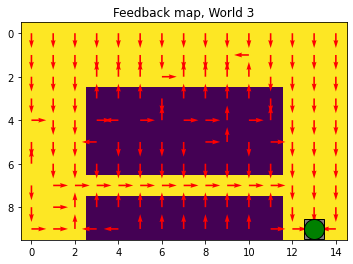

In [222]:
# Test loop
# Test the agent (subjectively) by letting it use the optimal policy to traverse the gridworld.
# Do not update the Q-table when testing.
# Also, you should not explore when testing, i.e. epsilon=0; always pick the optimal action.

W = World(world)
while(W.pos != W.term):
    W.action(getpolicy(Q)[W.pos]+1)
    W.draw()
plotarrows(getpolicy(Q))    

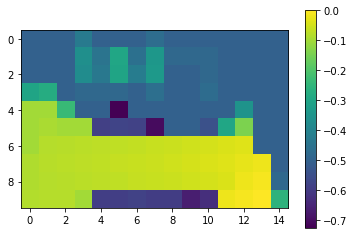

In [223]:
plt.imshow(getvalue(Q))
plt.colorbar()
plt.show()